# Medical Insurance Cost Prediction

This project explores how machine learning can help predict the medical insurance charges of individuals based on attributes such as age, BMI, smoking status, and region. We perform thorough EDA and use Linear Regression to build our predictive model.

#Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics

#Data Collection and Analysis

In [2]:
#loading the dataset into pandas dataframe
insurance_df=pd.read_csv('/content/insurance.csv')

In [3]:
#first 5 rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
insurance_df.shape

(1338, 7)

In [5]:
#loading information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Categorical Features:
- Sex
- Smoker
- Region

#Data Analysis

In [6]:
#Statestestical measures of the data
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
sns.set()

Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

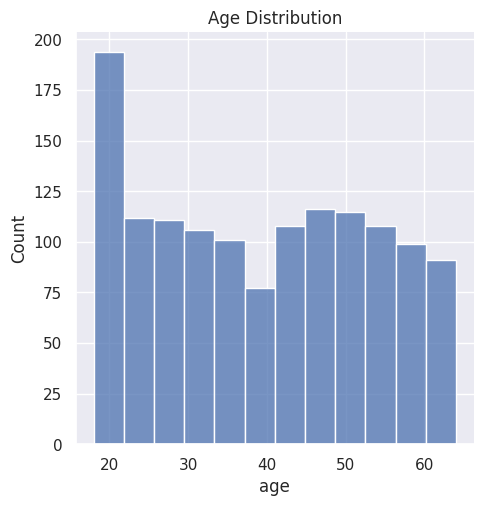

In [8]:
#distribution of age
plt.figure(figsize=(6,6))
sns.displot(insurance_df['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex')

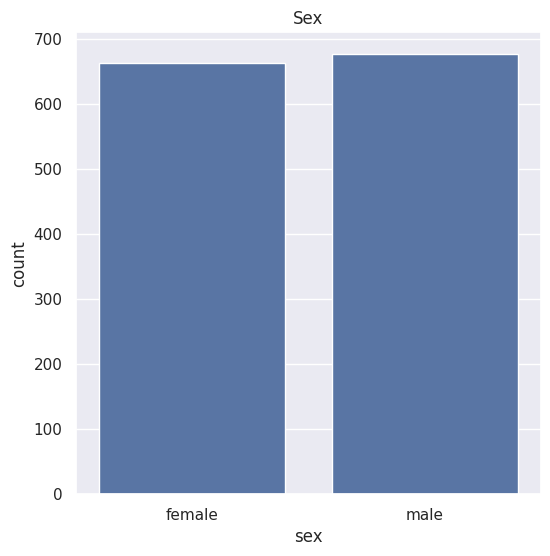

In [9]:
#Count of sex
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='sex')
plt.title('Sex')

In [10]:
insurance_df.sex.value_counts()

,count
sex,
male,676
female,662


Text(0.5, 1.0, 'Distribution of BMI')

<Figure size 600x600 with 0 Axes>

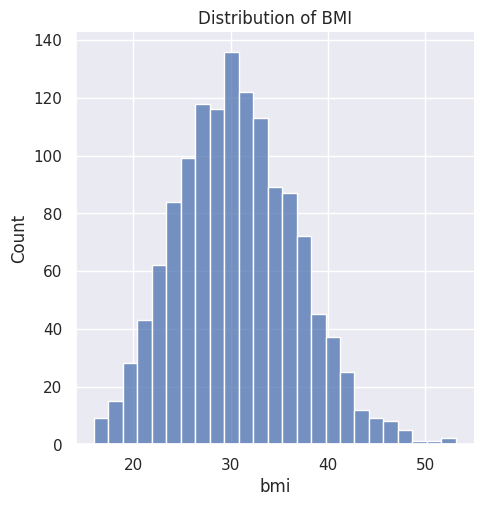

In [11]:
#distribution of bmi
plt.figure(figsize=(6,6))
sns.displot(insurance_df['bmi'])
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Count of Children')

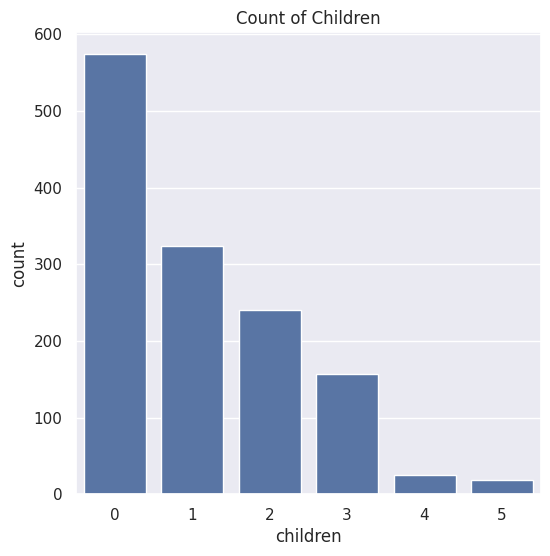

In [12]:
#count of children
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='children')
plt.title("Count of Children")

Text(0.5, 1.0, 'Count of Smoker')

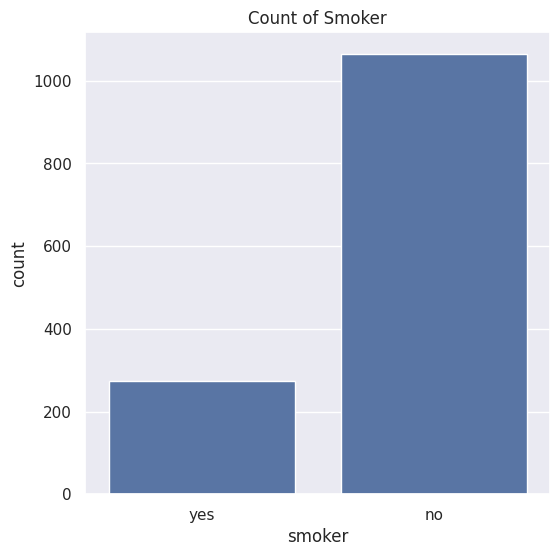

In [13]:
#count of smoker
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='smoker')
plt.title('Count of Smoker')

Text(0.5, 1.0, 'Count of Region')

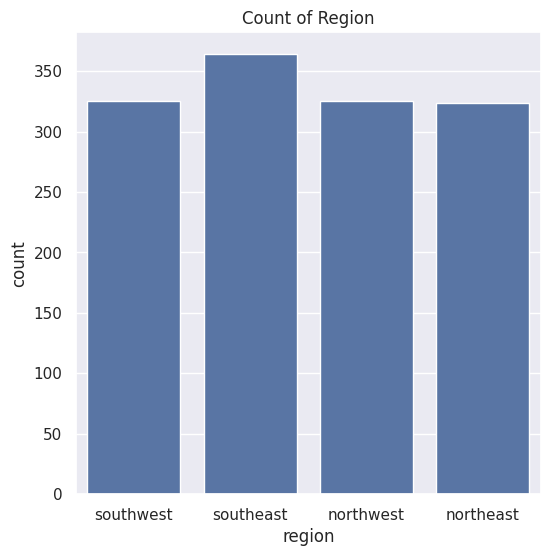

In [14]:
#count of region
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='region')
plt.title('Count of Region')

Text(0.5, 1.0, 'Charge Distribution')

<Figure size 600x600 with 0 Axes>

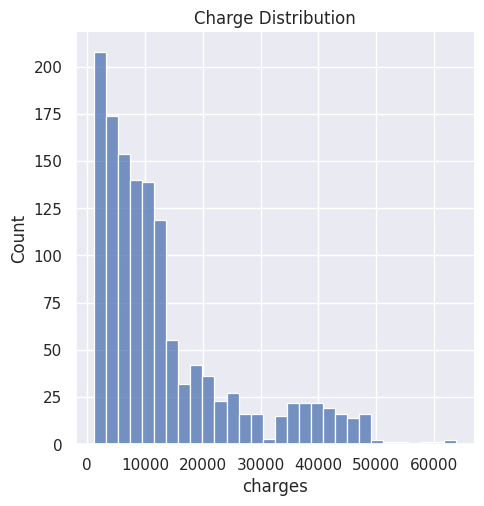

In [15]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.displot(insurance_df['charges'])
plt.title('Charge Distribution')

#Data Pre-Processing


In [16]:
#converting categorical features into numerical features
insurance_df=insurance_df.replace({'sex':{'male':0,'female':1},
                      'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3},
                      'smoker':{'no':0,'yes':1}})

/tmp/ipython-input-1862855244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df=insurance_df.replace({'sex':{'male':0,'female':1},


In [17]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


#Splitting the featues and targets


In [18]:
X=insurance_df.drop('charges',axis=1)
Y=insurance_df['charges']

In [19]:
X,Y

(      age  sex     bmi  children  smoker  region
 0      19    1  27.900         0       1       1
 1      18    0  33.770         1       0       0
 2      28    0  33.000         3       0       0
 3      33    0  22.705         0       0       2
 4      32    0  28.880         0       0       2
 ...   ...  ...     ...       ...     ...     ...
 1333   50    0  30.970         3       0       2
 1334   18    1  31.920         0       0       3
 1335   18    1  36.850         0       0       0
 1336   21    1  25.800         0       0       1
 1337   61    1  29.070         0       1       2
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

#Train Test Split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [21]:
X.shape,X_train.shape,X_test.shape

((1338, 6), (1204, 6), (134, 6))

#Model Training


##Linear Regression

In [22]:
model=LinearRegression()

In [23]:
model.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

In [24]:
X_train_prediction=model.predict(X_train)
accuracy=metrics.r2_score(Y_train,X_train_prediction)
print("R squared value",accuracy)

R squared value 0.7538541948445128


In [25]:
X_test_prediction=model.predict(X_test)
accuracy=metrics.r2_score(Y_test,X_test_prediction)
print("R squared value",accuracy)

R squared value 0.7058997983752827


#Building a Predictive System


In [27]:
def insurance_cost_predictor(parameter):
  input_array=np.asarray(parameter)
  input_array_reshape=input_array.reshape(1,-1)
  prediction=model.predict(input_array_reshape)
  print("Ypur insurance cost is: ",prediction)

In [28]:
insurance_cost_predictor([62,1,26.29,0,1,0])

Ypur insurance cost is:  [35561.36315903]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Conclusion

The Linear Regression model shows promising results in predicting insurance charges, particularly highlighting the impact of smoking and age. Future enhancements can include testing more complex models and deploying the solution as a web app.